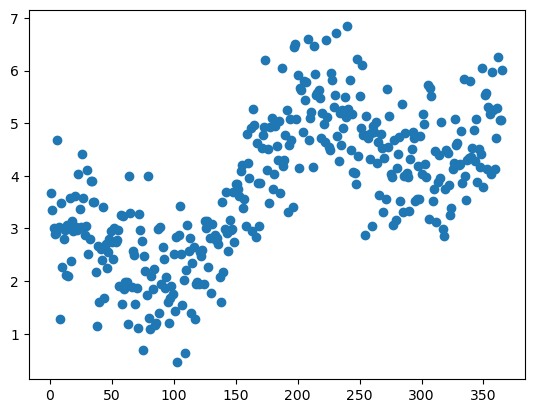

0.007839917843504936 2.3369159831756425


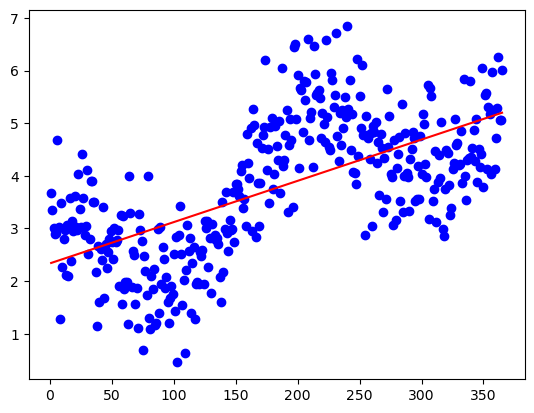

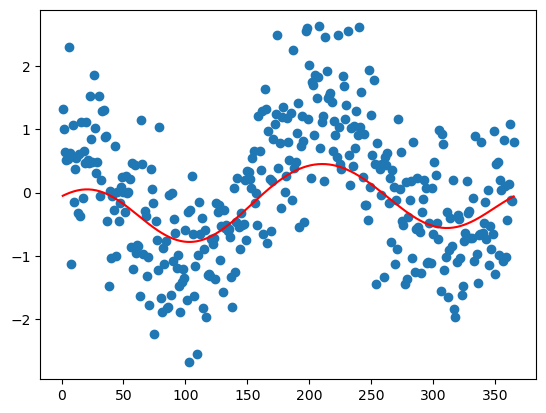

Останній графік це прогноз по категорії- Туризм і відпочинок -> Курорт буковель
Червона лінія - лінія тренду, яка показує на те, що продажі ростуть з кожним роком та мають певну періодичність
Періодичність це дні в році. Графік починається з початку року - 1 січня
Висновок по цьому графіку: з кожним роком продажі збільшуються і місяці пікових продажей будуть - Січень, Липень та січень!


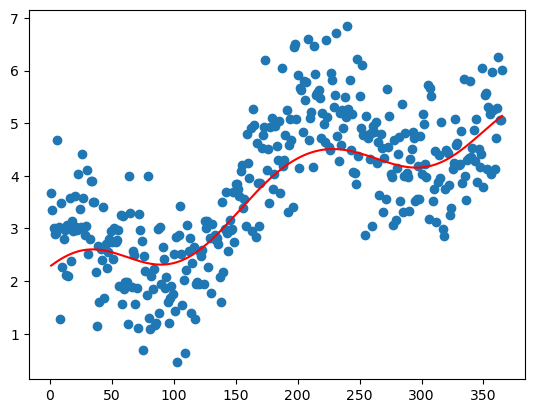

In [5]:
import matplotlib.pyplot as plt
import random
import numpy as np


X = np.linspace(1, 365, 365)
Y = 0.01*X + 2 + np.cos(4/365*2*np.pi/2.3*X) + 0.7*np.random.randn(365) 
plt.scatter(X,Y)
plt.show()


def mean(X):
    return sum(x for x in X)/len(X)

def var(X):
    return mean(X*X) - (mean(X))**2

def cov(X,Y):
    return mean(X*Y) - mean(X)*mean(Y)

k = cov(X,Y)/var(X)
b = mean(Y) - k*mean(X) 
Osc = Y - (k*X+b)
print(k, b)

Y_lr = k*X + b

plt.scatter(X,Y, c = 'b')
plt.plot(X,Y_lr, 'r')
plt.show()

Y_wt = Y - (k*X+b)


T = 365
def integrate(n):
    suma1 = 0
    suma2 = 0
    for i in range(T):
        suma1 += Osc[i]*np.cos(2*np.pi*n*X[i]/T)/T
        suma2 += Osc[i]*np.sin(2*np.pi*n*X[i]/T)/T
    return (suma1, suma2)

lst = []
for n in range(1,T):
    lst.append(integrate(n))

Y_osc = []
for t in range(T):
    suma = 0
    for n in range(4):
        suma += lst[n-1][0]*np.cos(2*np.pi*n*t/T) + lst[n-1][1]*np.sin(2*np.pi*n*t/T)
    Y_osc.append(suma)

plt.scatter(X, Y_wt)
plt.plot(X, Y_osc, c = 'r')
plt.show()

Y_appr = Y_lr + Y_osc
plt.scatter(X, Y)
plt.plot(X, Y_appr, c='r')
print("Останній графік це прогноз по категорії- Туризм і відпочинок -> Курорт буковель")
print("Червона лінія - лінія тренду, яка показує на те, що продажі ростуть з кожним роком та мають певну періодичність")
print("Періодичність це дні в році. Графік починається з початку року - 1 січня")
print("Висновок по цьому графіку: з кожним роком продажі збільшуються і місяці пікових продажей будуть - Січень, Липень та січень!")